# Dublin Bus Route Trips DataSet

The purpose of this notebook is to apply the CRISPDM steps of data understanding and data preparation, using 
the **Trips data** provided by Dublin Bus. Due to the size of the dataset it is necessary to sample it based on a route. This has been undertaken in the in the notebook labelled **Routes_DataExtractionNotebook**. The inported data is then used to prepare a  **Data Quality Report** and the **Data Quality Plan** for the given dataset in accordance with the CRISP-DM Methodology. 

### For the leavetimes dataset, we have the folowing columns and explanations for each of them taken from the National Transport Authority concept design document (I'll finish this later) :
- DATASOURCE: used to identify the system from which the data arrives.
- DAYOFSERVICE: (linked with the same column in the trips dataset) The day of the journey
- TRIPID: (linked with the same column in the trips dataset) Unique code for the journey
- LINEID: Specific Dublin Bus Route
- ROUTEID: Unique ID for spicific variations in the route
- DIRECTION: Specifies the Direction of travel
- PLANNEDTIME_ARR: Planned arrival time at the stop point, in seconds from midnight of the day of the journey
- PLANNEDTIME_DEP: Planned departure time at the stop point, in seconds from midnight of the day of the journey
- ACTUALTIME_ARR: Actual arrival time at the stop point, in seconds from midnight of the day of the journey
- ACTUALTIME_DEP: Actual departure time at the stop point, in seconds from midnight of the day of the journey
- BASIN: Not Known
- TENDERLOT: Not Known
- SUPPRESSED: When the trip is partially suppressed it says that the previous link is suppressed (0 =achieved, 1 = suppressed)
- JUSTIFICATIONID: Fault code
- LASTUPDATE: Time of the last record update
- NOTE: Free note

## Data Understanding: Data Quality Report
The data quality report uses tables and visualisations to explore the data.
For each feature in the dataframe, we prepare summary tables (with descriptive stats) and plots.

   **Tables:** One table for continuous features, one table for categorical features. We need to have an understanding of what the features measure, to be able to decide an initial grouping of features into continuous and categorical.

   **Plots:** For continuous features, we prepare 
histograms. For categorical features, we prepare bar plots.

In [1]:
#Import the required packages
#Import package pandas for data analysis
import pandas as pd

import datetime as dt
from matplotlib import pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

## Route Parameters

In [2]:
RouteNum = '46A'
RouteTrips = f'Route_{RouteNum}_Trips.csv'
RouteTripsCleaned = f'{RouteNum}/{RouteNum}_CleanedTripsData.csv'


## Read the csv file for route Trips data

In [3]:
# Reading from a csv file, into a data frame
df = pd.read_csv(RouteTrips)
# Show data frame first few rows
df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253924,46A,46A_74,1,65768,60960,66075.0,60926.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3059400,"
1,DB,07-FEB-18 00:00:00,6262164,46A,46A_74,1,28877,24480,29657.0,24697.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3059412,"
2,DB,18-FEB-18 00:00:00,6265839,46A,46A_67,2,73709,70200,74351.0,70279.0,BasDef,NaN,NaN,NaN,26-FEB-18 11:09:33,",2453087,"
3,DB,18-FEB-18 00:00:00,6279639,46A,46A_67,2,75509,72000,76133.0,72048.0,BasDef,NaN,NaN,NaN,26-FEB-18 11:09:33,",2453695,"
4,DB,18-FEB-18 00:00:00,6276477,46A,46A_67,2,76409,72900,77359.0,72911.0,BasDef,NaN,NaN,NaN,26-FEB-18 11:09:33,",2453505,"


In [4]:
# Check the number of rows and columns within the dataframe
df.shape

(76728, 16)

- The dataset has a total of **32277 rows** and **16 columns** .

### What datatypes are each column?

In [5]:
# Analyse the types of data based on their type and decide which would be better as a continuous or categorical columns
df.dtypes

DATASOURCE          object
DAYOFSERVICE        object
TRIPID               int64
LINEID              object
ROUTEID             object
DIRECTION            int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR     float64
ACTUALTIME_DEP     float64
BASIN               object
TENDERLOT          float64
SUPPRESSED         float64
JUSTIFICATIONID    float64
LASTUPDATE          object
NOTE                object
dtype: object

In [6]:
# Descriptive stats for the leavetimes dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TRIPID,76728.0,7.153650e+06,741117.760041,5955250.0,6583908.75,7107337.0,8020848.00,8591175.0
DIRECTION,76728.0,1.495034e+00,0.499979,1.0,1.00,1.0,2.00,2.0
PLANNEDTIME_ARR,76728.0,5.520855e+04,17008.001871,20507.0,40456.00,55202.0,69234.75,87162.0
PLANNEDTIME_DEP,76728.0,5.112730e+04,17176.146790,18900.0,36240.00,50880.0,64800.00,84600.0
ACTUALTIME_ARR,72170.0,5.518051e+04,16890.652900,20611.0,40524.00,55094.0,69011.75,88928.0
ACTUALTIME_DEP,73152.0,5.115638e+04,17185.743357,18798.0,36331.25,50882.0,64812.25,85656.0
TENDERLOT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUPPRESSED,116.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
JUSTIFICATIONID,116.0,2.420904e+05,36919.448671,182630.0,207928.00,237472.5,276183.50,297899.0


In [7]:
# Look at column names to check for spaces. 
df.columns

Index(['DATASOURCE', 'DAYOFSERVICE', 'TRIPID', 'LINEID', 'ROUTEID',
       'DIRECTION', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'BASIN', 'TENDERLOT', 'SUPPRESSED', 'JUSTIFICATIONID',
       'LASTUPDATE', 'NOTE'],
      dtype='object')

In [8]:
# Get the number of unique values for all features
df.nunique()

DATASOURCE             1
DAYOFSERVICE         360
TRIPID             23279
LINEID                 1
ROUTEID               14
DIRECTION              2
PLANNEDTIME_ARR    12721
PLANNEDTIME_DEP      340
ACTUALTIME_ARR     42200
ACTUALTIME_DEP     36819
BASIN                  1
TENDERLOT              0
SUPPRESSED             1
JUSTIFICATIONID       91
LASTUPDATE           360
NOTE                2256
dtype: int64

In [9]:
# Missing data
df.isnull().sum()

DATASOURCE             0
DAYOFSERVICE           0
TRIPID                 0
LINEID                 0
ROUTEID                0
DIRECTION              0
PLANNEDTIME_ARR        0
PLANNEDTIME_DEP        0
ACTUALTIME_ARR      4558
ACTUALTIME_DEP      3576
BASIN                  0
TENDERLOT          76728
SUPPRESSED         76612
JUSTIFICATIONID    76612
LASTUPDATE             0
NOTE                   0
dtype: int64

Based on examining the data, folowing will be categorical  features are categorical and the rest continuous.

- *'DATASOURCE'* will be converted to **categorical** because it contains only a single value possible value for the company, Dublin Bus in this case.
- *'TRIPID'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different Trip, thus a different category.
- *'PROGRNUMBER'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different stop on the route.
- *'STOPPOINTID'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different stop identification on the route.
- *'VEHICLEID'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning
- *'SUPPRESSED'* column will be converted to **categorical** because it contains only 2 possible values, *(0 and 1)*.
- *'JUSTIFICATIONID'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning
- *'NOTE'* column will be converted to **categorical** but has no unique values.

In [10]:
# Select columns containing categorical data
categorical_columns = df[['DATASOURCE','TRIPID','LINEID','ROUTEID','DIRECTION','BASIN','SUPPRESSED', 'TENDERLOT','JUSTIFICATIONID','NOTE' ]].columns

for column in categorical_columns:
    df[column] = df[column].astype('category')  
df.dtypes

DATASOURCE         category
DAYOFSERVICE         object
TRIPID             category
LINEID             category
ROUTEID            category
DIRECTION          category
PLANNEDTIME_ARR       int64
PLANNEDTIME_DEP       int64
ACTUALTIME_ARR      float64
ACTUALTIME_DEP      float64
BASIN              category
TENDERLOT          category
SUPPRESSED         category
JUSTIFICATIONID    category
LASTUPDATE           object
NOTE               category
dtype: object

In [11]:
# Select columns containing datetime data for continuous data
#datetime_columns= df[['PLANNEDTIME_ARR','PLANNEDTIME_DEP','ACTUALTIME_ARR','ACTUALTIME_DEP']].columns

# convert seconds to datetime
#for column in datetime_columns:
    #df[column] = df[column].astype('timedelta64[s]')
    #df[column] =pd.to_timedelta(df[column], unit='s')
    #df[column] =pd.to_datetime(df[column], unit='s').dt.strftime("%H:%M:%S")
    
# convert DAYOFERVICE to datetime
df['DAYOFSERVICE'] = pd.to_datetime(df['DAYOFSERVICE'])   

# convert LASTUPDATE to datetime
df['LASTUPDATE'] = pd.to_datetime(df['LASTUPDATE'])

df.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                    category
TENDERLOT                category
SUPPRESSED               category
JUSTIFICATIONID          category
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

In [12]:
# Specify the continuous columns set
continuous_columns = df.select_dtypes(['datetime64[ns]', 'float64', 'int64']).columns
continuous_columns

Index(['DAYOFSERVICE', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'LASTUPDATE'],
      dtype='object')

In [13]:
df[continuous_columns].head()

,DAYOFSERVICE,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE
0,2018-02-07,65768,60960,66075.0,60926.0,2018-02-28 12:05:11
1,2018-02-07,28877,24480,29657.0,24697.0,2018-02-28 12:05:11
2,2018-02-18,73709,70200,74351.0,70279.0,2018-02-26 11:09:33
3,2018-02-18,75509,72000,76133.0,72048.0,2018-02-26 11:09:33
4,2018-02-18,76409,72900,77359.0,72911.0,2018-02-26 11:09:33


### Check for duplicate rows/columns

In [14]:
# duplicate rows
print("Number of duplicated (excluding first) rows in the CSV file is:", df.duplicated().sum())
print("Number of duplicated (including first) rows in the CSV file is:", df[df.duplicated(keep=False)].shape[0])

Number of duplicated (excluding first) rows in the CSV file is: 0
Number of duplicated (including first) rows in the CSV file is: 0


In [15]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [16]:
df.nunique()

DATASOURCE             1
DAYOFSERVICE         360
TRIPID             23279
LINEID                 1
ROUTEID               14
DIRECTION              2
PLANNEDTIME_ARR    12721
PLANNEDTIME_DEP      340
ACTUALTIME_ARR     42200
ACTUALTIME_DEP     36819
BASIN                  1
TENDERLOT              0
SUPPRESSED             1
JUSTIFICATIONID       91
LASTUPDATE           360
NOTE                2256
dtype: int64

#### Result - Duplicate rows exist

- Rows - There are no duplicate columns in the dataset. 
- Columns - There are 5 duplicate columns. Analysis the number of unique values indicate that the columns PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE and NOTE are constant columns and can be dropped. These columns can be safely dropped as they add no information.

## Descriptive statistics: Continuous features

In [17]:
# Analyse the summary stats table for continuous features
df[continuous_columns].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
DAYOFSERVICE,76728,2018-06-29 00:59:45.361276160,2018-01-01 00:00:00,2018-03-29 00:00:00,2018-06-27 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,NaN
PLANNEDTIME_ARR,76728.0,55208.548522,20507.0,40456.0,55202.0,69234.75,87162.0,17008.001871
PLANNEDTIME_DEP,76728.0,51127.303722,18900.0,36240.0,50880.0,64800.0,84600.0,17176.14679
ACTUALTIME_ARR,72170.0,55180.508549,20611.0,40524.0,55094.0,69011.75,88928.0,16890.6529
ACTUALTIME_DEP,73152.0,51156.384337,18798.0,36331.25,50882.0,64812.25,85656.0,17185.743357
LASTUPDATE,76728,2018-07-16 18:11:19.373318656,2018-01-08 17:21:10,2018-04-09 08:59:24,2018-07-06 10:51:00,2018-10-26 15:16:06,2019-01-16 18:27:21,NaN


In [18]:
# Prepare %missing column
continuous_columns_missing  = 100 * (df[continuous_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe to be added to the 
df_continuous_missing = pd.DataFrame(continuous_columns_missing, columns=['%missing'])
df_continuous_missing

,%missing
DAYOFSERVICE,0.000000
PLANNEDTIME_ARR,0.000000
PLANNEDTIME_DEP,0.000000
ACTUALTIME_ARR,5.940465
ACTUALTIME_DEP,4.660619
LASTUPDATE,0.000000


In [19]:
# Check the cardinality of the continuous dataset
df_continuous_card = df[continuous_columns].nunique()
# store the values in a dataframe
df_continuous_card = pd.DataFrame(df_continuous_card, columns=['card'])
df_continuous_card

,card
DAYOFSERVICE,360
PLANNEDTIME_ARR,12721
PLANNEDTIME_DEP,340
ACTUALTIME_ARR,42200
ACTUALTIME_DEP,36819
LASTUPDATE,360


In [20]:
# Calculating the first date (Min)
min = df[continuous_columns].min().T
df_table_min = pd.DataFrame(min, columns=['Min'])
df_table_min

,Min
DAYOFSERVICE,2018-01-01 00:00:00
PLANNEDTIME_ARR,20507
PLANNEDTIME_DEP,18900
ACTUALTIME_ARR,20611.0
ACTUALTIME_DEP,18798.0
LASTUPDATE,2018-01-08 17:21:10


In [21]:
# Calculating the last date (Min)
max = df[continuous_columns].max().T
df_table_max = pd.DataFrame(max, columns=['Max'])
df_table_max

,Max
DAYOFSERVICE,2018-12-31 00:00:00
PLANNEDTIME_ARR,87162
PLANNEDTIME_DEP,84600
ACTUALTIME_ARR,88928.0
ACTUALTIME_DEP,85656.0
LASTUPDATE,2019-01-16 18:27:21


In [22]:
# Add missing values column
df_table_continuous = df[continuous_columns].describe(datetime_is_numeric=True).T

# Put the columns together to prepare the final table for numeric_columns
df_continuous_columns_data_quality_report_table = pd.concat([df_table_continuous, df_continuous_missing, df_continuous_card, df_table_min,df_table_max ], axis=1)


df_continuous_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,card,Min,Max
DAYOFSERVICE,76728,2018-06-29 00:59:45.361276160,2018-01-01 00:00:00,2018-03-29 00:00:00,2018-06-27 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,NaN,0.000000,360,2018-01-01 00:00:00,2018-12-31 00:00:00
PLANNEDTIME_ARR,76728.0,55208.548522,20507.0,40456.0,55202.0,69234.75,87162.0,17008.001871,0.000000,12721,20507,87162
PLANNEDTIME_DEP,76728.0,51127.303722,18900.0,36240.0,50880.0,64800.0,84600.0,17176.14679,0.000000,340,18900,84600
ACTUALTIME_ARR,72170.0,55180.508549,20611.0,40524.0,55094.0,69011.75,88928.0,16890.6529,5.940465,42200,20611.0,88928.0
ACTUALTIME_DEP,73152.0,51156.384337,18798.0,36331.25,50882.0,64812.25,85656.0,17185.743357,4.660619,36819,18798.0,85656.0
LASTUPDATE,76728,2018-07-16 18:11:19.373318656,2018-01-08 17:21:10,2018-04-09 08:59:24,2018-07-06 10:51:00,2018-10-26 15:16:06,2019-01-16 18:27:21,NaN,0.000000,360,2018-01-08 17:21:10,2019-01-16 18:27:21


In [23]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
   

DAYOFSERVICE
----------

Range DAYOFSERVICE is:  364 days 00:00:00
----------
Value  Number of Instances
PLANNEDTIME_ARR
----------

Range PLANNEDTIME_ARR is:  66655
----------
Value  Number of Instances
PLANNEDTIME_DEP
----------

Range PLANNEDTIME_DEP is:  65700
----------
Value  Number of Instances
ACTUALTIME_ARR
----------

Range ACTUALTIME_ARR is:  68317.0
----------
Value  Number of Instances
ACTUALTIME_DEP
----------

Range ACTUALTIME_DEP is:  66858.0
----------
Value  Number of Instances
LASTUPDATE
----------

Range LASTUPDATE is:  373 days 01:06:11
----------
Value  Number of Instances


## Descriptive statistics: Categorical features

In [24]:
# Summary stats table for categorical features
df_table_categorical = df[categorical_columns].describe().T
df_table_categorical

,count,unique,top,freq
DATASOURCE,76728,1,DB,76728
TRIPID,76728,23279,7331125,19
LINEID,76728,1,46A,76728
ROUTEID,76728,14,46A_74,37182
DIRECTION,76728,2,1,38745
BASIN,76728,1,BasDef,76728
SUPPRESSED,116.0,1.0,0.0,116.0
TENDERLOT,0,0,NaN,NaN
JUSTIFICATIONID,116.0,91.0,297898.0,5.0
NOTE,76728,2256,",2092641,",243


In [25]:
# Prepare %missing column
categorical_columns_perc_missing  = 100 * (df[categorical_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_categorical_perc_missing = pd.DataFrame(categorical_columns_perc_missing, columns=['%missing'])
df_categorical_perc_missing

,%missing
DATASOURCE,0.000000
TRIPID,0.000000
LINEID,0.000000
ROUTEID,0.000000
DIRECTION,0.000000
BASIN,0.000000
SUPPRESSED,99.848817
TENDERLOT,100.000000
JUSTIFICATIONID,99.848817
NOTE,0.000000


In [26]:
# Prepare the cardinality column
category_columns_card = df[categorical_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
DATASOURCE,1
TRIPID,23279
LINEID,1
ROUTEID,14
DIRECTION,2
BASIN,1
SUPPRESSED,1
TENDERLOT,0
JUSTIFICATIONID,91
NOTE,2256


In [27]:
# Look at the values taken by each categorical feature, excluding the NaN values.
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=True))


DATASOURCE
DB    76728
Name: DATASOURCE, dtype: int64

TRIPID
7331125    19
7328184    19
7328175    19
7328178    19
7328180    19
           ..
6583659     1
6583658     1
6583657     1
6583638     1
5955250     1
Name: TRIPID, Length: 23279, dtype: int64

LINEID
46A    76728
Name: LINEID, dtype: int64

ROUTEID
46A_74    37182
46A_67    35759
46A_66      979
46A_64      397
46A_73      350
46A_70      319
46A_68      315
46A_62      302
46A_69      245
46A_72      201
46A_63      189
46A_65      183
46A_77      174
46A_71      133
Name: ROUTEID, dtype: int64

DIRECTION
1    38745
2    37983
Name: DIRECTION, dtype: int64

BASIN
BasDef    76728
Name: BASIN, dtype: int64

SUPPRESSED
0.0    116
Name: SUPPRESSED, dtype: int64

TENDERLOT
Series([], Name: TENDERLOT, dtype: int64)

JUSTIFICATIONID
297898.0    5
287866.0    3
236947.0    2
206879.0    2
291668.0    2
           ..
235477.0    1
232115.0    1
231729.0    1
229283.0    1
182630.0    1
Name: JUSTIFICATIONID, Length: 91, dtype: 

In [28]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df_table_categorical, df_categorical_perc_missing, df_category_card], axis=1)

#df_category_columns_data_quality_report_table.to_csv("DublinBusTrips-DataQualityReport-CategoryFeatures-Table.csv", 
                                         #index_label='Feature')
df_category_columns_data_quality_report_table

,count,unique,top,freq,%missing,card
DATASOURCE,76728,1,DB,76728,0.000000,1
TRIPID,76728,23279,7331125,19,0.000000,23279
LINEID,76728,1,46A,76728,0.000000,1
ROUTEID,76728,14,46A_74,37182,0.000000,14
DIRECTION,76728,2,1,38745,0.000000,2
BASIN,76728,1,BasDef,76728,0.000000,1
SUPPRESSED,116.0,1.0,0.0,116.0,99.848817,1
TENDERLOT,0,0,NaN,NaN,100.000000,0
JUSTIFICATIONID,116.0,91.0,297898.0,5.0,99.848817,91
NOTE,76728,2256,",2092641,",243,0.000000,2256


In [29]:
df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253924,46A,46A_74,1,65768,60960,66075.0,60926.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3059400,"
1,DB,2018-02-07,6262164,46A,46A_74,1,28877,24480,29657.0,24697.0,BasDef,NaN,NaN,NaN,2018-02-28 12:05:11,",3059412,"
2,DB,2018-02-18,6265839,46A,46A_67,2,73709,70200,74351.0,70279.0,BasDef,NaN,NaN,NaN,2018-02-26 11:09:33,",2453087,"
3,DB,2018-02-18,6279639,46A,46A_67,2,75509,72000,76133.0,72048.0,BasDef,NaN,NaN,NaN,2018-02-26 11:09:33,",2453695,"
4,DB,2018-02-18,6276477,46A,46A_67,2,76409,72900,77359.0,72911.0,BasDef,NaN,NaN,NaN,2018-02-26 11:09:33,",2453505,"


## Data Quality Report: Visualisations

Plot histograms for continuous features and barplots for categorical features. This is a visual approach to exploring the distribution of values for each feature.

array([[<AxesSubplot:title={'center':'DAYOFSERVICE'}>,
        <AxesSubplot:title={'center':'PLANNEDTIME_ARR'}>],
       [<AxesSubplot:title={'center':'PLANNEDTIME_DEP'}>,
        <AxesSubplot:title={'center':'ACTUALTIME_ARR'}>],
       [<AxesSubplot:title={'center':'ACTUALTIME_DEP'}>,
        <AxesSubplot:title={'center':'LASTUPDATE'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

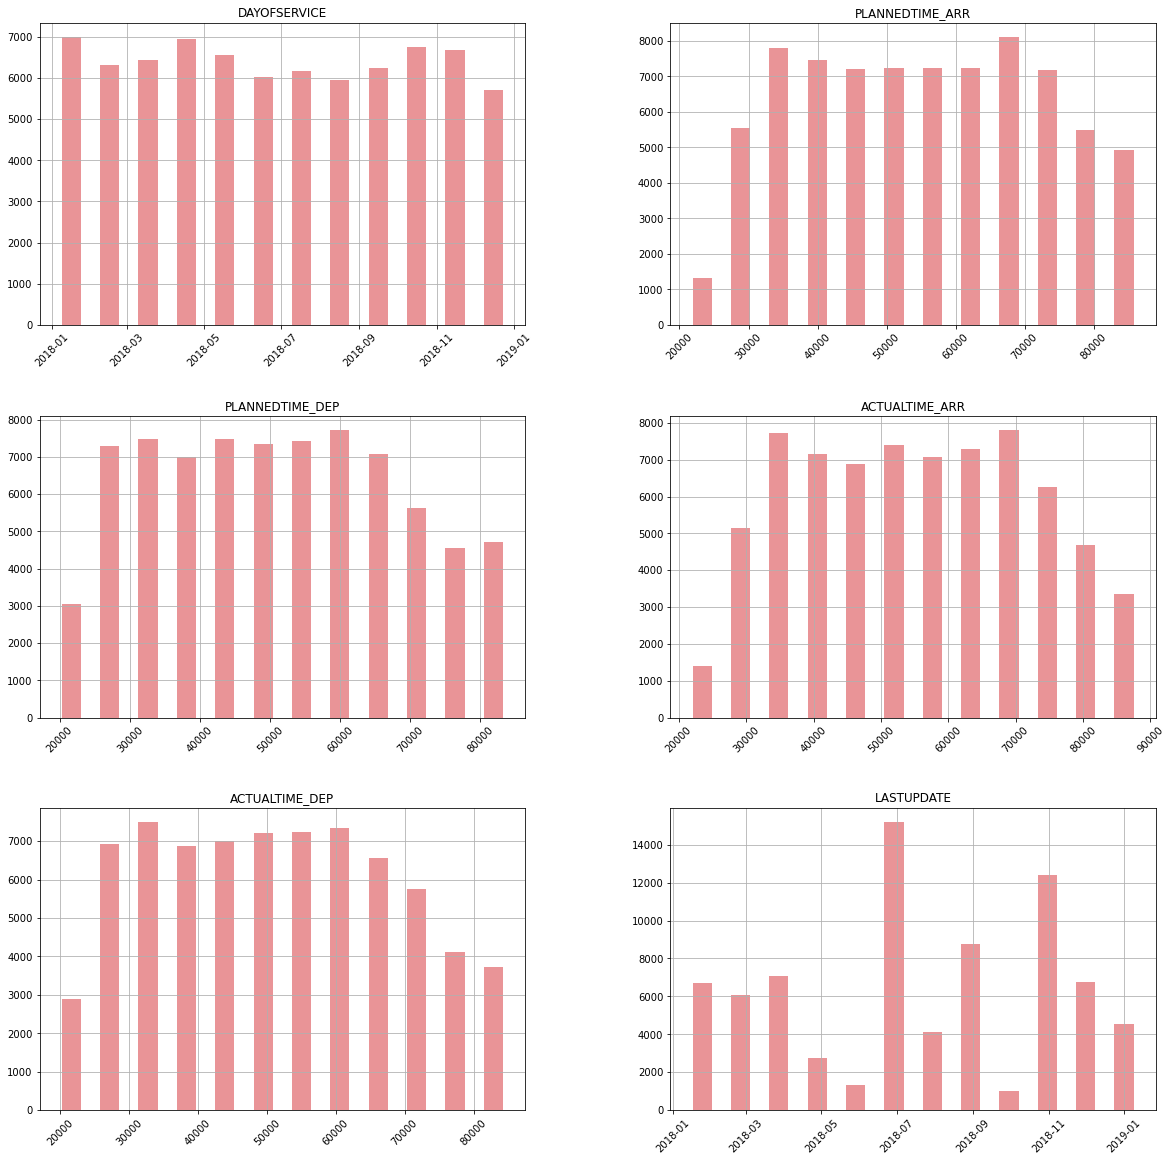

In [30]:
# Plot the histograms of all continuous features.
plt.figure()
df.hist(figsize=(20, 20),xrot=45, bins=12, rwidth=0.5, color=['#E99497'])

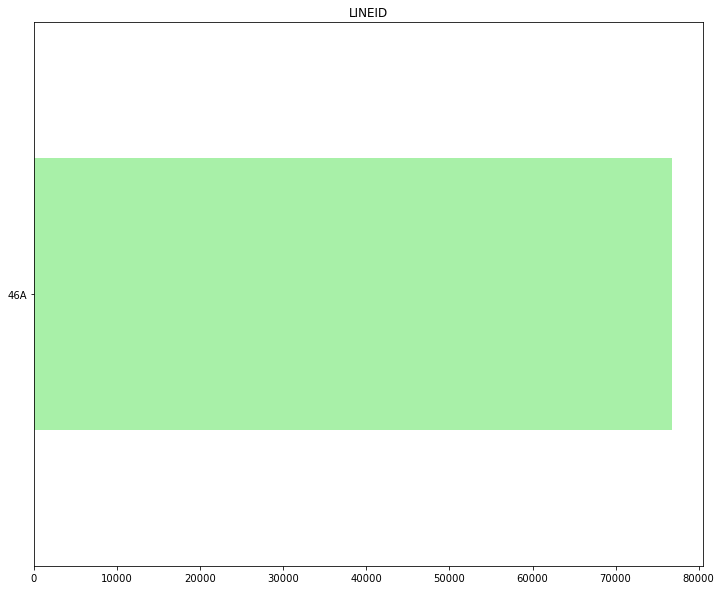

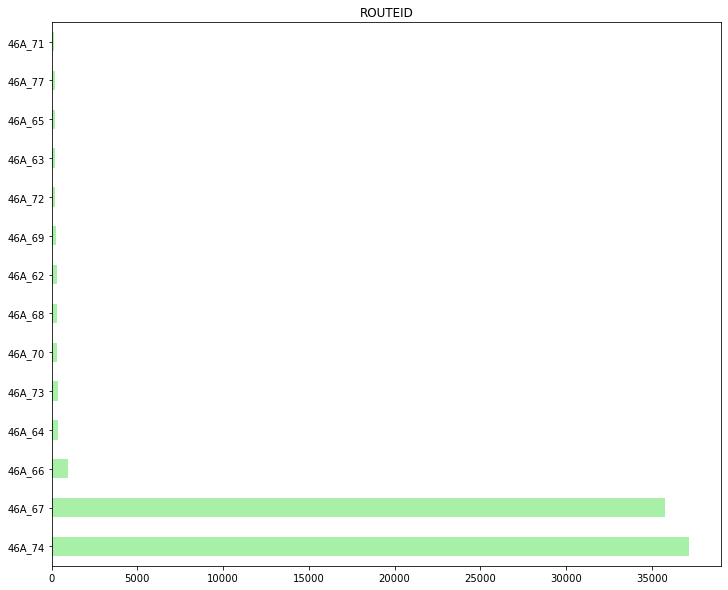

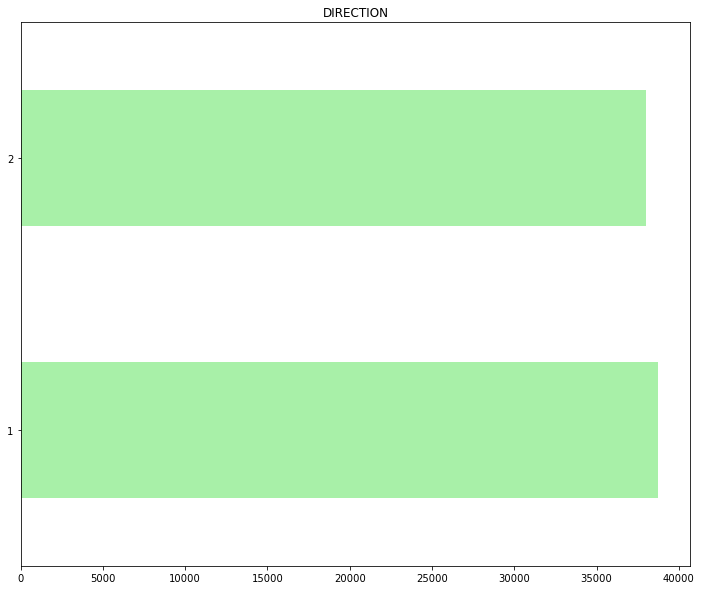

In [31]:
# Plot bar charts for all categorical features and save them in a single PDF file
#categoricalPDF = PdfPages('DublinBusTrips_DataQualityReport_CategoricalFeatures_barcharts.pdf')
# Select columns containing categorical data
categorical_columns_Plot = df[['LINEID','ROUTEID', 'DIRECTION']].columns

for col in categorical_columns_Plot:
        f = df[col].value_counts().plot.barh(stacked=True, color="#a8f0a8", figsize=(12,10)) 
        plt.title(col)
        
        #categoricalPDF.savefig(f.get_figure(), bbox_inches='tight')
        plt.show()
        
#categoricalPDF.close() 

# Data Understanding: Data Quality Plan
In this section we list all features and the observations and actions involving those features, as a step towards obtaining a cleaner dataset.

In [33]:
# List all features that need to be discussed in the data quality plan
df.nunique()

DATASOURCE             1
DAYOFSERVICE         360
TRIPID             23279
LINEID                 1
ROUTEID               14
DIRECTION              2
PLANNEDTIME_ARR    12721
PLANNEDTIME_DEP      340
ACTUALTIME_ARR     42200
ACTUALTIME_DEP     36819
BASIN                  1
TENDERLOT              0
SUPPRESSED             1
JUSTIFICATIONID       91
LASTUPDATE           360
NOTE                2256
dtype: int64

In [34]:
df.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                    category
TENDERLOT                category
SUPPRESSED               category
JUSTIFICATIONID          category
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

# Data Quality Plan for CDC Dataset
This section details the data quality plan and the actions required to provide a cleaner dataset

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|
DATASOURCE (category)         | Single value (constant column)      | Drop the column as its constant    
DAYOFSERVICE (datetime)      |  No values are missing | Keep|
TRIPID (category)             | No values are missing   | Keep  | 
LINEID (category)           | No values are missing | keep|   
ROUTEID (category)                | No values are missing | Keep|
DIRECTION (category)    | No values are missing | keep feature|
BASIN (category)                    | No values are missing  | Feature is not useful, drop feature |   
TENDERLOT (category)             | Missing Values (100%) | Feature is not useful, drop feature |
SUPPRESSED	(category)               | Missing values (99.94%) | Too many missing values, remove rows affected where trip is suppressed, drop feature |
JUSTIFICATIONID (category)         | Missing values (99.94%) | Too many missing values and provides no information, drop feature|
LASTUPDATE (datetime)         | No values are missing | Feature is not useful, drop feature|
NOTE (category)         | No values are missing | Feature is not useful, drop feature|
ARR_PLAN (datetime)         | No values are missing | Keep|
DEP_PLAN (datetime)         | No values are missing | Keep|
ARR_ACT (datetime)         | Missing values | Investigate rows affected, consider dropping the row|
DEP_ACT (datetime)         | Missing values | Investigate rows affected, consider dropping the row|

# Implementating the data quality strategy

Investigations of the features indicate that following columns can be dropped:

- DATASOURCE
- BASIN
- TENDERLOT
- LASTUPDATE
- SUPPRESSED
- JUSTIFICATIONID
- NOTE

In [35]:
# Drop columns DATASOURCE, BASIN, TENDERLOT,SUPPRESSED, JUSTIFICATIONID, NOTE due to the large amount of missing values
df.drop(columns=['DATASOURCE', 'BASIN', 'TENDERLOT', 'JUSTIFICATIONID','NOTE'], inplace=True)

In [36]:
# Drop column LASTUPDATE
df.drop(columns=['LASTUPDATE'], inplace=True)

In [37]:
# Drop the missing values for suppressed
df = df.drop(df[df['SUPPRESSED'] == 1].index, axis = 0)

In [38]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED
0,2018-02-07,6253924,46A,46A_74,1,65768,60960,66075.0,60926.0,NaN
1,2018-02-07,6262164,46A,46A_74,1,28877,24480,29657.0,24697.0,NaN
2,2018-02-18,6265839,46A,46A_67,2,73709,70200,74351.0,70279.0,NaN
3,2018-02-18,6279639,46A,46A_67,2,75509,72000,76133.0,72048.0,NaN
4,2018-02-18,6276477,46A,46A_67,2,76409,72900,77359.0,72911.0,NaN


In [39]:
# drop SUPPRESSED column
df.drop(columns='SUPPRESSED', inplace=True)

In [40]:
df.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-02-07,6253924,46A,46A_74,1,65768,60960,66075.0,60926.0
1,2018-02-07,6262164,46A,46A_74,1,28877,24480,29657.0,24697.0
2,2018-02-18,6265839,46A,46A_67,2,73709,70200,74351.0,70279.0
3,2018-02-18,6279639,46A,46A_67,2,75509,72000,76133.0,72048.0
4,2018-02-18,6276477,46A,46A_67,2,76409,72900,77359.0,72911.0


In [41]:
# Save cleaned data to a csv
df.to_csv(RouteTripsCleaned, index_label=False)